# Compare measured data with simulated data

In [1]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
from scipy.interpolate import interp2d
from ipywidgets import interact
import matplotlib.pyplot as plt
from pyuvdata import UVData

## Load Visibility Data J0136
Calibrated visibilities from IDR2.1 at LST=1.6 h. Select visibilities of an EQ29 triad (37, 39, 68).

In [2]:
vis_file = "/lustre/aoc/projects/hera/H1C_IDR3/IDR3_2/LSTBIN/all_epochs_preprocessed/zen.grp1.of1.LST.0.40170.sum.LPXL.uvh5"

# visibility data
UV = UVData()
UV.read(vis_file)

UVlst = np.unique(UV.lst_array * 12 / np.pi)
UVfrq = UV.freq_array[0] * 1e-6
#UV.select(bls=[(0, 11), (11, 12), (12, 0)])
print(np.argmin(np.abs(UVlst - 1.6)))

# (ant1, ant2, pol)
vis1 = UV.get_data(37, 39, 'xx')[[11, 12]]
vis2 = UV.get_data(39, 68, 'xx')[[11, 12]]
vis3 = UV.get_data(68, 37, 'xx')[[11, 12]]

antenna_diameters is not set. Using known values for HERA.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.


11


## Load Simulated Data J0136

In [3]:
trclass = "EQ28"
field = "J0136"

vis_gleam_path = f"/users/pkeller/code/ClosureSim/data/vis_{trclass}_{field}.h5"
vis_bright_path = f"/users/pkeller/code/ClosureSim/data/vis_bright_{trclass}_{field}.h5"

with h5py.File(vis_gleam_path) as f:
    lstm = f["LST"][()]
    freqm = f["Frequencies"][()]
    vis = f["Visibilities"][()]

with h5py.File(vis_bright_path) as f:
    vis += f["Visibilities"][()]

# pseudo Stokes I
vis = 0.5 * (vis[:, 0, 0] + vis[:, 1, 0])

## Load Validation Visibilities

In [4]:
validation_file = "/lustre/aoc/projects/hera/Validation/test-4.0.0/pipeline/LSTBIN/foregrounds/zen.grp1.of1.LST.0.37586.HH.OCRSLP.uvh5"

# visibility data
UV = UVData()
UV.read(validation_file)

UVlst = np.unique(UV.lst_array * 12 / np.pi)
UVfrq = UV.freq_array[0] * 1e-6
#UV.select(bls=[(0, 11), (11, 12), (12, 0)])
print(np.argmin(np.abs(UVlst - 1.6)))

# (ant1, ant2, pol)
vis1v = UV.get_data(37, 39, 'xx')[[27, 28]]
vis2v = UV.get_data(39, 68, 'xx')[[27, 28]]
vis3v = UV.get_data(68, 37, 'xx')[[27, 28]]

LST values stored in /lustre/aoc/projects/hera/Validation/test-4.0.0/pipeline/LSTBIN/foregrounds/zen.grp1.of1.LST.0.37586.HH.OCRSLP.uvh5 are not self-consistent with time_array and telescope location. Consider recomputing with utils.get_lst_for_time.


27


Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.


## Plot Data
The model and the data seem to agree well up to some oscillations of period ~10 MHz.

(0.0, 80.0)

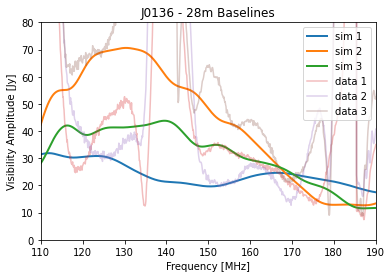

In [5]:
# sim
plt.plot(UVfrq, np.abs(vis[0]), linewidth=2.0, label="sim 1")
plt.plot(UVfrq, np.abs(vis[1]), linewidth=2.0, label="sim 2")
plt.plot(UVfrq, np.abs(vis[2]), linewidth=2.0, label="sim 3")

# data
plt.plot(UVfrq, np.abs(vis1[1]), alpha=0.3, label="data 1")
plt.plot(UVfrq, np.abs(vis2[1]), alpha=0.3, label="data 2")
plt.plot(UVfrq, np.abs(vis3[1]), alpha=0.3, label="data 3")

plt.legend()
plt.title("J0136 - 28m Baselines")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Visibility Amplitude [Jy]")
plt.xlim([110, 190])
plt.ylim([0, 80])

## Load Visibility Data Fornax A
Calibrated visibilities from IDR2.1 at LST=3.36 h. Select visibilities of an EQ29 triad (37, 39, 68).

In [6]:
vis_file = "/lustre/aoc/projects/hera/H1C_IDR3/IDR3_2/LSTBIN/all_epochs_preprocessed/zen.grp1.of1.LST.0.87153.sum.LPXL.uvh5"

# visibility data
UV = UVData()
UV.read(vis_file)

UVlst = np.unique(UV.lst_array * 12 / np.pi)
UVfrq = UV.freq_array[0] * 1e-6

#UV.select(bls=[(0, 11), (11, 12), (12, 0)])
print(np.argmin(np.abs(UVlst - 3.366666)))

# (ant1, ant2, pol)
vis1 = UV.get_data(37, 39, 'xx')[[6, 7]]
vis2 = UV.get_data(39, 68, 'xx')[[6, 7]]
vis3 = UV.get_data(68, 37, 'xx')[[6, 7]]

antenna_diameters is not set. Using known values for HERA.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.


6


In [7]:
print(np.where(np.isclose(UV.get_redundancies()[-1], 29.22, 0.1)))
ew28 = UV.get_redundancies()[0][49]
ew28_pairs = UV.baseline_to_antnums(ew28)
ew28_pairs = [(ew28_pairs[0][i], ew28_pairs[1][i]) for i in range(len(ew28_pairs[0]))]

ant1, ant2 = ew28_pairs[10]
vis1 = UV.get_data(ant1, ant2, 'xx')[[6, 7]]
vis2 = UV.get_data(ant1, ant2, 'xx')[[6, 7]]
vis3 = UV.get_data(ant1, ant2, 'xx')[[6, 7]]

(array([ 7, 49, 53]),)


## Load Validation Data

In [8]:
validation_file = "/lustre/aoc/projects/hera/Validation/test-4.0.0/pipeline/LSTBIN/foregrounds/zen.grp1.of1.LST.0.84569.HH.OCRSLP.uvh5"

# visibility data
UV = UVData()
UV.read(validation_file)

UVlst = np.unique(UV.lst_array * 12 / np.pi)
UVfrq = UV.freq_array[0] * 1e-6
#UV.select(bls=[(0, 11), (11, 12), (12, 0)])
print(np.argmin(np.abs(UVlst - 3.37)))

# (ant1, ant2, pol)
vis1v = UV.get_data(37, 39, 'xx')[[23, 24]]
vis2v = UV.get_data(39, 68, 'xx')[[23, 24]]
vis3v = UV.get_data(68, 37, 'xx')[[23, 24]]

LST values stored in /lustre/aoc/projects/hera/Validation/test-4.0.0/pipeline/LSTBIN/foregrounds/zen.grp1.of1.LST.0.84569.HH.OCRSLP.uvh5 are not self-consistent with time_array and telescope location. Consider recomputing with utils.get_lst_for_time.


23


Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.


## Plot Data
The model and the data seem to agree well up to some oscillations of period ~10 MHz.

antenna_diameters is not set. Using known values for HERA.
Fixing auto-correlations to be be real-only, after some imaginary values were detected in data_array.


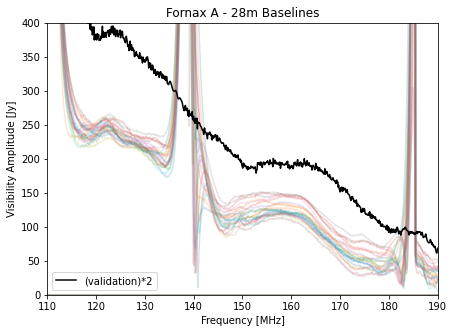

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5), sharex=True, sharey=True)

vis_file = "/lustre/aoc/projects/hera/H1C_IDR3/IDR3_2/LSTBIN/all_epochs_preprocessed/zen.grp1.of1.LST.0.87153.sum.LPXL.uvh5"

# visibility data
UV = UVData()
UV.read(vis_file)

for ants in ew28_pairs:
    ant1, ant2 = ants
    try:
        vis = UV.get_data((ant1, ant2, 'xx'))[[6, 7]]
        ax.plot(UVfrq, np.abs(vis)[0], alpha=0.2)
    
    except:
        pass
    
# data
# sim
ax.plot(UVfrq, 2*np.abs(vis1v[1]), label="(validation)*2", color="k")


ax.legend()
plt.setp(ax, title="Fornax A - 28m Baselines", xlabel="Frequency [MHz]", ylabel="Visibility Amplitude [Jy]", xlim=[110, 190], ylim=[0, 400]);

## Load Simulated Data Fornax A

In [10]:
trclass = "EQ28"
field = "FornaxA"

vis_gleam_path = f"/users/pkeller/code/ClosureSim/data/vis_{trclass}_{field}.h5"
vis_bright_path = f"/users/pkeller/code/ClosureSim/data/vis_bright_{trclass}_{field}.h5"

with h5py.File(vis_gleam_path) as f:
    lstm = f["LST"][()]
    freqm = f["Frequencies"][()]
    vis = f["Visibilities"][()]

with h5py.File(vis_bright_path) as f:
    vis += f["Visibilities"][()]

# pseudo Stokes I
vis = 0.5 * (vis[:, 0, 0] + vis[:, 1, 0])

(0.0, 400.0)

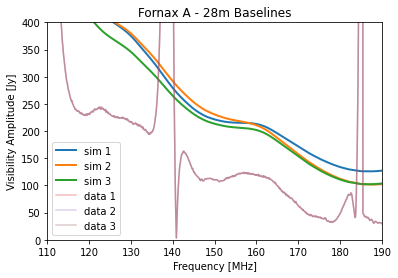

In [11]:
# sim
plt.plot(UVfrq, np.abs(vis[0]), linewidth=2.0, label="sim 1")
plt.plot(UVfrq, np.abs(vis[1]), linewidth=2.0, label="sim 2")
plt.plot(UVfrq, np.abs(vis[2]), linewidth=2.0, label="sim 3")

# data
plt.plot(UVfrq, np.abs(vis1[1]), alpha=0.3, label="data 1")
plt.plot(UVfrq, np.abs(vis2[1]), alpha=0.3, label="data 2")
plt.plot(UVfrq, np.abs(vis3[1]), alpha=0.3, label="data 3")

plt.legend()
plt.title("Fornax A - 28m Baselines")
plt.xlabel("Frequency [MHz]")
plt.ylabel("Visibility Amplitude [Jy]")
plt.xlim([110, 190])
plt.ylim([0, 400])
